In [162]:
import os
import requests
import yfinance as yf # Used to grab the stock prices, with yahoo
import numpy as np
import pandas as pd
from datetime import datetime
import seaborn as sns
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from utils.MCForecastTools import MCSimulation
import hvplot.pandas
from bokeh.models.formatters import NumeralTickFormatter


In [3]:
amazon = yf.Ticker("AMZN")
walmart = yf.Ticker("WMT")
ebay = yf.Ticker("EBAY")
target = yf.Ticker("TGT")
overstock = yf.Ticker("OSTK")
print(walmart)

yfinance.Ticker object <WMT>


In [4]:
total_investment = 500000

#Amazon Data
initial_amazon_price = 1627.800049
initial_amazon_investment = 100000
amount_of_amazon_stock = initial_amazon_investment/initial_amazon_price
current_amazon_price = amazon.info['open']
current_amazon_investment_value = current_amazon_price * amount_of_amazon_stock

#Walmart Data
initial_walmart_price = 97.519066
initial_walmart_investment = 100000
amount_of_walmart_stock = initial_walmart_investment/initial_walmart_price
current_walmart_price = walmart.info['open']
current_walmart_investment_value = current_walmart_price * amount_of_walmart_stock

#Ebay Data
initial_ebay_price = 28.541014
initial_ebay_investment = 100000
amount_of_ebay_stock = initial_ebay_investment/initial_ebay_price
current_ebay_price = ebay.info['open']
current_ebay_investment_value = current_ebay_price * amount_of_ebay_stock

#Target Data
initial_target_price = 79.590614
initial_target_investment = 100000
amount_of_target_stock = initial_target_investment/initial_target_price
current_target_price = target.info['open']
current_target_investment_value = current_target_price * amount_of_target_stock

#Overstock Data
initial_overstock_price = 19.799999
initial_overstock_investment = 100000
amount_of_overstock_stock = initial_overstock_investment/initial_overstock_price
current_overstock_price = overstock.info['open']
current_overstock_investment_value = current_overstock_price * amount_of_overstock_stock


print("Current Amazon Price:",current_amazon_price)
print("Current Amazon Investment Value:",current_amazon_investment_value)
print("Current Walmart Price:",current_walmart_price)
print("Current Walmart Investment Value:",current_walmart_investment_value)
print("Current Ebay Price:",current_ebay_price)
print("Current Ebay Investment Value:",current_ebay_investment_value)
print("Current Target Price:",current_target_price)
print("Current Target Investment Value:",current_target_investment_value)
print("Current Overstock Price:",current_overstock_price)
print("Current Overstock Investment Value:",current_overstock_investment_value)

Current Amazon Price: 3515.25
Current Amazon Investment Value: 215950.97027792264
Current Walmart Price: 149.52
Current Walmart Investment Value: 153323.86386883567
Current Ebay Price: 74.1
Current Ebay Investment Value: 259626.3748723153
Current Target Price: 252.78
Current Target Investment Value: 317600.26376979577
Current Overstock Price: 105.67
Current Overstock Investment Value: 533686.8956407523


# Amazon Expected Rate of Return Calculations

In [5]:
amazon_historical_year1_begin = amazon.history(start="2018-11-05", end="2018-11-06")
amazon_historical_year1_end = amazon.history(start="2019-11-05", end="2019-11-06")
initial_value_year1_amazon = amazon_historical_year1_begin['Close']['2018-11-05']
current_value_year1_amazon= amazon_historical_year1_end['Close']['2019-11-05']

In [6]:
year1_ror_amazon = ((current_value_year1_amazon - initial_value_year1_amazon)/initial_value_year1_amazon)*100

year1_ror_amazon

10.683739211985838

In [7]:
amazon_historical_year2_begin = amazon.history(start="2019-11-05", end="2019-11-06")
amazon_historical_year2_end = amazon.history(start="2020-11-05", end="2020-11-06")
initial_value_year2_amazon = amazon_historical_year2_begin['Close']['2019-11-05']
current_value_year2_amazon= amazon_historical_year2_end['Close']['2020-11-05']

In [8]:
year2_ror_amazon = ((current_value_year2_amazon - initial_value_year2_amazon)/initial_value_year2_amazon)*100

year2_ror_amazon

84.38039817859662

In [9]:
amazon_historical_year3_begin = amazon.history(start="2020-11-05", end="2020-11-06")
amazon_historical_year3_end = amazon.history(start="2021-11-03", end="2021-11-04")
initial_value_year3_amazon = amazon_historical_year3_begin['Close']['2020-11-05']
current_value_year3_amazon= amazon_historical_year3_end['Close']['2021-11-03']

In [10]:
year3_ror_amazon = ((current_value_year3_amazon - initial_value_year3_amazon)/initial_value_year3_amazon)*100

year3_ror_amazon

1.8663455749548463

In [11]:
expected_ror_amazon = (year1_ror_amazon + year2_ror_amazon + year3_ror_amazon)/3

expected_ror_amazon

32.310160988512436

# Walmart Expected Rate of Return Calculations

In [12]:
walmart_historical_year1_begin = walmart.history(start="2018-11-05", end="2018-11-06")
walmart_historical_year1_end = walmart.history(start="2019-11-05", end="2019-11-06")
initial_value_year1_wmt = walmart_historical_year1_begin['Close']['2018-11-05']
current_value_year1_wmt= walmart_historical_year1_end['Close']['2019-11-05']

In [13]:
year1_ror_wmt = ((current_value_year1_wmt - initial_value_year1_wmt)/initial_value_year1_wmt)*100

year1_ror_wmt

17.952102711794023

In [14]:
walmart_historical_year2_begin = walmart.history(start="2019-11-05", end="2019-11-06")
walmart_historical_year2_end = walmart.history(start="2020-11-05", end="2020-11-06")
initial_value_year2_wmt = walmart_historical_year2_begin['Close']['2019-11-05']
current_value_year2_wmt= walmart_historical_year2_end['Close']['2020-11-05']

In [15]:
year2_ror_wmt = ((current_value_year2_wmt - initial_value_year2_wmt)/initial_value_year2_wmt)*100

year2_ror_wmt

22.821495133636702

In [16]:
walmart_historical_year3_begin = walmart.history(start="2020-11-05", end="2020-11-06")
walmart_historical_year3_end = walmart.history(start="2021-11-03", end="2021-11-04")
initial_value_year3_wmt = walmart_historical_year3_begin['Close']['2020-11-05']
current_value_year3_wmt= walmart_historical_year3_end['Close']['2021-11-03']

In [17]:
year3_ror_wmt = ((current_value_year3_wmt - initial_value_year3_wmt)/initial_value_year3_wmt)*100

year3_ror_wmt

6.302263743819454

In [18]:
expected_ror_wmt = (year1_ror_wmt + year2_ror_wmt + year3_ror_wmt)/3

expected_ror_wmt

15.691953863083393

# Ebay Expected Rate of Return Calculations

In [19]:
ebay_historical_year1_begin = ebay.history(start="2018-11-05", end="2018-11-06")
ebay_historical_year1_end = ebay.history(start="2019-11-05", end="2019-11-06")
initial_value_year1_ebay = ebay_historical_year1_begin['Close']['2018-11-05']
current_value_year1_ebay= ebay_historical_year1_end['Close']['2019-11-05']

In [20]:
year1_ror_ebay = ((current_value_year1_ebay - initial_value_year1_ebay)/initial_value_year1_ebay)*100

year1_ror_ebay

21.036550219855194

In [21]:
ebay_historical_year2_begin = ebay.history(start="2019-11-05", end="2019-11-06")
ebay_historical_year2_end = ebay.history(start="2020-11-05", end="2020-11-06")
initial_value_year2_ebay = ebay_historical_year2_begin['Close']['2019-11-05']
current_value_year2_ebay= ebay_historical_year2_end['Close']['2020-11-05']

In [22]:
year2_ror_ebay = ((current_value_year2_ebay - initial_value_year2_ebay)/initial_value_year2_ebay)*100

year2_ror_ebay

41.3755543143596

In [23]:
ebay_historical_year3_begin = ebay.history(start="2020-11-05", end="2020-11-06")
ebay_historical_year3_end = ebay.history(start="2021-11-03", end="2021-11-04")
initial_value_year3_ebay = ebay_historical_year3_begin['Close']['2020-11-05']
current_value_year3_ebay= ebay_historical_year3_end['Close']['2021-11-03']

In [24]:
year3_ror_ebay = ((current_value_year3_ebay - initial_value_year3_ebay)/initial_value_year3_ebay)*100

year3_ror_ebay

54.48945270214486

In [25]:
expected_ror_ebay = (year1_ror_ebay + year2_ror_ebay + year3_ror_ebay)/3

expected_ror_ebay

38.967185745453214

# Target Expected Rate of Return Calculations

In [26]:
target_historical_year1_begin = target.history(start="2018-11-05", end="2018-11-06")
target_historical_year1_end = target.history(start="2019-11-05", end="2019-11-06")
initial_value_year1_target = target_historical_year1_begin['Close']['2018-11-05']
current_value_year1_target= target_historical_year1_end['Close']['2019-11-05']

In [27]:
year1_ror_target = ((current_value_year1_target - initial_value_year1_target)/initial_value_year1_target)*100

year1_ror_target

33.37207592487113

In [28]:
target_historical_year2_begin = target.history(start="2019-11-05", end="2019-11-06")
target_historical_year2_end = target.history(start="2020-11-05", end="2020-11-06")
initial_value_year2_target = target_historical_year2_begin['Close']['2019-11-05']
current_value_year2_target= target_historical_year2_end['Close']['2020-11-05']

In [29]:
year2_ror_target = ((current_value_year2_target - initial_value_year2_target)/initial_value_year2_target)*100

year2_ror_target

47.307620628610564

In [30]:
target_historical_year3_begin = target.history(start="2020-11-05", end="2020-11-06")
target_historical_year3_end = target.history(start="2021-11-03", end="2021-11-04")
initial_value_year3_target = target_historical_year3_begin['Close']['2020-11-05']
current_value_year3_target= target_historical_year3_end['Close']['2021-11-03']

In [31]:
year3_ror_target = ((current_value_year3_target - initial_value_year3_target)/initial_value_year3_target)*100

year3_ror_target

66.5350453183703

In [32]:
expected_ror_target = (year1_ror_target + year2_ror_target + year3_ror_target)/3

expected_ror_target

49.071580623950666

# Overstock Expected Rate of Return Calculations

In [33]:
overstock_historical_year1_begin = overstock.history(start="2018-11-05", end="2018-11-06")
overstock_historical_year1_end = overstock.history(start="2019-11-05", end="2019-11-06")
initial_value_year1_overstock = overstock_historical_year1_begin['Close']['2018-11-05']
current_value_year1_overstock= overstock_historical_year1_end['Close']['2019-11-05']

In [34]:
year1_ror_overstock = ((current_value_year1_overstock - initial_value_year1_overstock)/initial_value_year1_overstock)*100

year1_ror_overstock

-49.34343374015091

In [35]:
overstock_historical_year2_begin = overstock.history(start="2019-11-05", end="2019-11-06")
overstock_historical_year2_end = overstock.history(start="2020-11-05", end="2020-11-06")
initial_value_year2_overstock = overstock_historical_year2_begin['Close']['2019-11-05']
current_value_year2_overstock= overstock_historical_year2_end['Close']['2020-11-05']

In [36]:
year2_ror_overstock = ((current_value_year2_overstock - initial_value_year2_overstock)/initial_value_year2_overstock)*100

year2_ror_overstock

583.3499774702757

In [37]:
overstock_historical_year3_begin = overstock.history(start="2020-11-05", end="2020-11-06")
overstock_historical_year3_end = overstock.history(start="2021-11-03", end="2021-11-04")
initial_value_year3_overstock = overstock_historical_year3_begin['Close']['2020-11-05']
current_value_year3_overstock= overstock_historical_year3_end['Close']['2021-11-03']

In [38]:
year3_ror_overstock = ((current_value_year3_overstock - initial_value_year3_overstock)/initial_value_year3_overstock)*100

year3_ror_overstock

52.90341647488361

In [39]:
expected_ror_overstock = (year1_ror_overstock + year2_ror_overstock + year3_ror_overstock)/3

expected_ror_overstock

195.6366534016695

In [40]:
amazon_history = amazon.history(period = "3y")

amazon_history['Close']

Date
2018-11-12    1636.849976
2018-11-13    1631.170044
2018-11-14    1599.010010
2018-11-15    1619.439941
2018-11-16    1593.410034
                 ...     
2021-11-03    3384.000000
2021-11-04    3477.000000
2021-11-05    3518.989990
2021-11-08    3488.979980
2021-11-09    3576.229980
Name: Close, Length: 754, dtype: float64

In [41]:
walmart_history = walmart.history(period = "3y")

walmart_history['Close']

Date
2018-11-12     98.428764
2018-11-13     97.547493
2018-11-14     96.211349
2018-11-15     94.325577
2018-11-16     92.572517
                 ...    
2021-11-03    150.179993
2021-11-04    151.279999
2021-11-05    150.229996
2021-11-08    149.270004
2021-11-09    149.789993
Name: Close, Length: 754, dtype: float64

In [42]:
ebay_history = ebay.history(period = "3y")

ebay_history['Close']

Date
2018-11-12    27.886225
2018-11-13    27.058111
2018-11-14    26.855896
2018-11-15    27.125515
2018-11-16    27.077374
                ...    
2021-11-03    75.449997
2021-11-04    76.279999
2021-11-05    75.570000
2021-11-08    73.760002
2021-11-09    73.959999
Name: Close, Length: 754, dtype: float64

In [43]:
target_history = target.history(period = "3y")

target_history['Close']

Date
2018-11-12     79.702515
2018-11-13     78.630119
2018-11-14     77.520424
2018-11-15     75.310356
2018-11-16     74.303223
                 ...    
2021-11-03    260.410004
2021-11-04    260.440002
2021-11-05    254.270004
2021-11-08    253.330002
2021-11-09    255.160004
Name: Close, Length: 754, dtype: float64

In [44]:
overstock_history = overstock.history(period = "3y")

overstock_history['Close']

Date
2018-11-12     17.760000
2018-11-13     17.790001
2018-11-14     16.950001
2018-11-15     17.530001
2018-11-16     17.190001
                 ...    
2021-11-03    104.800003
2021-11-04    104.889999
2021-11-05    104.459999
2021-11-08    105.360001
2021-11-09    101.980003
Name: Close, Length: 754, dtype: float64

In [45]:
start = datetime(2018, 11, 5)
symbols_list = ['AMZN', 'WMT', 'EBAY', 'TGT', 'OSTK']


,Overstock,Target,Ebay,Walmart,Amazon
Date,,,,,
2018-11-12,17.760000,79.702515,27.886225,98.428764,1636.849976
2018-11-13,17.790001,78.630119,27.058111,97.547493,1631.170044
2018-11-14,16.950001,77.520424,26.855896,96.211349,1599.010010
2018-11-15,17.530001,75.310356,27.125515,94.325577,1619.439941
2018-11-16,17.190001,74.303223,27.077374,92.572517,1593.410034
...,...,...,...,...,...
2021-11-03,104.800003,260.410004,75.449997,150.179993,3384.000000
2021-11-04,104.889999,260.440002,76.279999,151.279999,3477.000000
2021-11-05,104.459999,254.270004,75.570000,150.229996,3518.989990


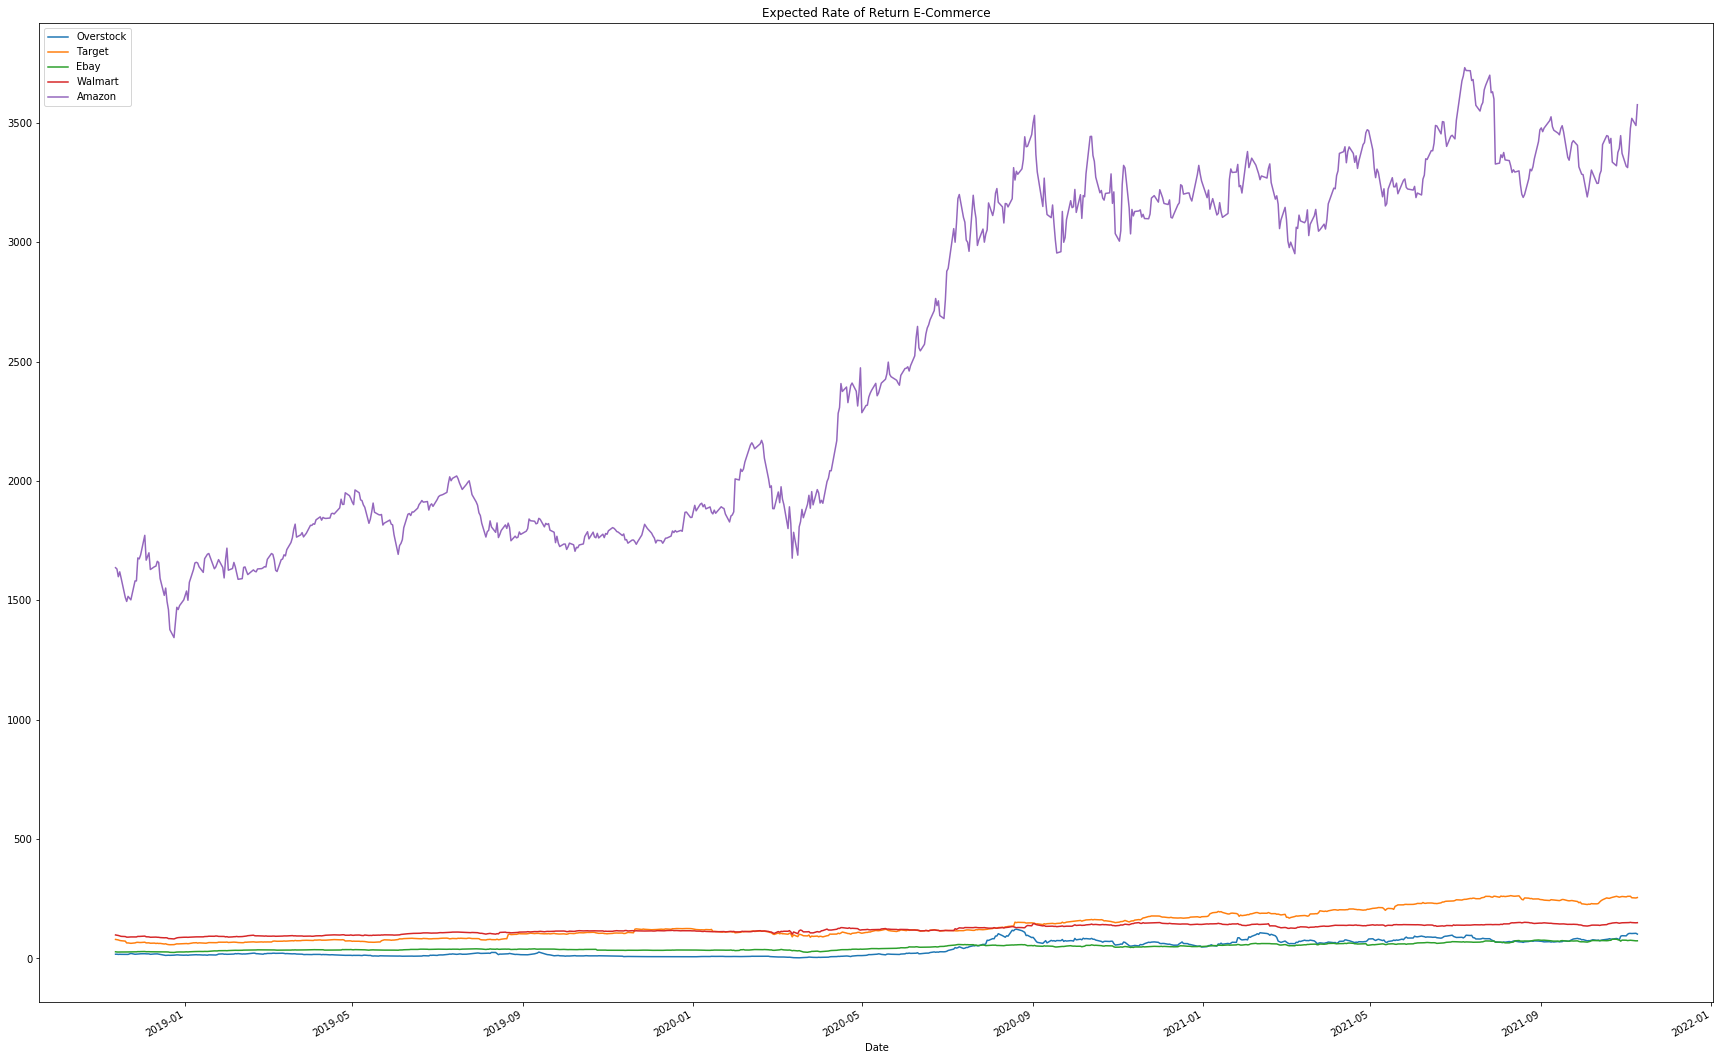

In [46]:
overstock_df = pd.DataFrame(data = overstock_history['Close'])
target_df = pd.DataFrame(data = target_history['Close'])
ebay_df = pd.DataFrame(data = ebay_history['Close'])
walmart_df = pd.DataFrame(data = walmart_history['Close'])
amazon_df = pd.DataFrame(data = amazon_history['Close'])


dataframe = pd.concat([overstock_df, target_df, ebay_df, walmart_df, amazon_df], axis = 1)

dataframe.columns = [ "Overstock", "Target", "Ebay", "Walmart", "Amazon"]
display(dataframe)
dataframe.plot(figsize=(30,20), title=("Expected Rate of Return E-Commerce"))

In [47]:
corr_df = dataframe.corr(method='pearson')
 #reset symbol as index (rather than 0-X)
corr_df.head().reset_index()
corr_df.head(10)

,Overstock,Target,Ebay,Walmart,Amazon
Overstock,1.000000,0.827188,0.882598,0.805327,0.921020
Target,0.827188,1.000000,0.935963,0.896235,0.887373
Ebay,0.882598,0.935963,1.000000,0.851498,0.922229
Walmart,0.805327,0.896235,0.851498,1.000000,0.921137
Amazon,0.921020,0.887373,0.922229,0.921137,1.000000


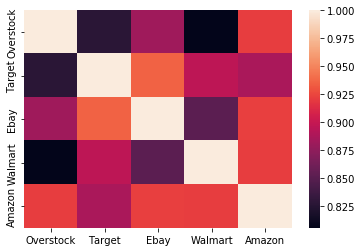

In [48]:
# Create a heatmap from the correlation values
sns.heatmap(corr_df)

# Overstock Portfolio Variances

In [49]:
overstock_std = float(overstock_df['Close'].std())/100
target_std = float(target_df['Close'].std())/100
ebay_std = float(ebay_df['Close'].std())/100
walmart_std = float(walmart_df['Close'].std())/100
amazon_std = float(amazon_df['Close'].std())/100

In [50]:
display(overstock_std)
display(target_std)
display(ebay_std)
display(walmart_std)
display(amazon_std)

0.3248195960683731

0.6051912413140953

0.1404380223202387

0.1867419801462856

7.226393299242334

In [51]:
def variance(weight1, std_1, weight2, std_2, corr_ratio):
    variance = (((weight1 ** 2) * (std_1 ** 2)) + ((weight2 ** 2) * (std_2 ** 2)) + ((weight1 ** 2) * (std_1 ** 2) * (weight2 ** 2) * (std_2 ** 2) * (corr_ratio)))
    return variance
                                                                                 

In [52]:
ostk_to_target_variance = variance(.50,overstock_std,.50,target_std,0.825182)
ostk_to_ebay_variance = variance(.50,overstock_std,.50,ebay_std,0.880374)
ostk_to_walmart_variance = variance(.50,overstock_std,.50,walmart_std,0.803650)
ostk_to_amazon_variance = variance(.50,overstock_std,.50,amazon_std,0.825182)

ostk_to_target_percentage = "{:.2%}".format(ostk_to_target_variance)
ostk_to_ebay_percentage = "{:.2%}".format(ostk_to_ebay_variance)
ostk_to_walmart_percentage = "{:.2%}".format(ostk_to_walmart_variance)
ostk_to_amazon_percentage = "{:.2%}".format(ostk_to_amazon_variance)

print("Overstock and Target Portfolio Variance",ostk_to_target_percentage)
print("Overstock and Ebay Portfolio Variance",ostk_to_ebay_percentage)
print("Overstock and Walmart Portfolio Variance",ostk_to_walmart_percentage)
print("Overstock and Amazon Portfolio Variance",ostk_to_amazon_percentage)

Overstock and Target Portfolio Variance 11.99%
Overstock and Ebay Portfolio Variance 3.14%
Overstock and Walmart Portfolio Variance 3.53%
Overstock and Amazon Portfolio Variance 1336.57%


In [53]:
tgt_to_ebay_variance = variance(.50,target_std,.50,ebay_std,0.935200)
tgt_to_walmart_variance = variance(.50,target_std,.50,walmart_std,0.895973)
tgt_to_amazon_variance = variance(.50,target_std,.50,amazon_std,0.887384)

tgt_to_ebay_percentage = "{:.2%}".format(tgt_to_ebay_variance)
tgt_to_walmart_percentage = "{:.2%}".format(tgt_to_walmart_variance)
tgt_to_amazon_percentage = "{:.2%}".format(tgt_to_amazon_variance)


print("Target and Ebay Portfolio Variance",tgt_to_ebay_percentage)
print("Target and Walmart Portfolio Variance",tgt_to_walmart_percentage)
print("Target and Amazon Portfolio Variance",tgt_to_amazon_percentage)

Target and Ebay Portfolio Variance 9.69%
Target and Walmart Portfolio Variance 10.10%
Target and Amazon Portfolio Variance 1420.75%


In [54]:
ebay_to_walmart_variance = variance(.50,ebay_std,.50,walmart_std,0.851683)
ebay_to_amazon_variance = variance(.50,ebay_std,.50,amazon_std,0.922619)

ebay_to_walmart_percentage = "{:.2%}".format(ebay_to_walmart_variance)
ebay_to_amazon_percentage = "{:.2%}".format(ebay_to_amazon_variance)


print("Ebay and Walmart Portfolio Variance",ebay_to_walmart_percentage)
print("Ebay and Amazon Portfolio Variance",ebay_to_amazon_percentage)

Ebay and Walmart Portfolio Variance 1.37%
Ebay and Amazon Portfolio Variance 1311.95%


In [55]:
walmart_to_amazon_variance = variance(.50,walmart_std,.50,amazon_std,0.921194)

walmart_to_amazon_percentage = "{:.2%}".format(walmart_to_amazon_variance)

print("Walmart and Amazon Portfolio Variance",walmart_to_amazon_percentage)

Walmart and Amazon Portfolio Variance 1316.88%


In [86]:
overstock_vs = [ostk_to_target_variance, ostk_to_ebay_variance, ostk_to_walmart_variance]
ebay_vs = [tgt_to_ebay_variance, ostk_to_ebay_variance, ebay_to_walmart_variance]
target_vs = [tgt_to_ebay_variance, tgt_to_walmart_variance,  ostk_to_target_variance]
walmart_vs =[ostk_to_walmart_variance, ebay_to_walmart_variance, tgt_to_walmart_variance]
amazon_vs = [ostk_to_amazon_variance, ebay_to_amazon_variance,tgt_to_amazon_variance, walmart_to_amazon_variance]

overstock_vs_dataframe = pd.DataFrame(overstock_vs)
ebay_vs_dataframe = pd.DataFrame(ebay_vs)
target_vs_dataframe = pd.DataFrame(target_vs)
walmart_vs_dataframe = pd.DataFrame(walmart_vs)
amazon_vs_dataframe = pd.DataFrame(amazon_vs)

overstock_vs_dataframe = overstock_vs_dataframe.set_axis(['Target', 'Ebay', 'Walmart',], axis='index')
ebay_vs_dataframe = ebay_vs_dataframe.set_axis(['Target', 'Overstock', 'Walmart',], axis='index')
target_vs_dataframe = target_vs_dataframe.set_axis(['Ebay', 'Walmart', 'Overstock'], axis='index')
walmart_vs_dataframe = walmart_vs_dataframe.set_axis(['Overstock', 'Ebay', 'Target',], axis='index')
amazon_vs_dataframe = amazon_vs_dataframe.set_axis(['Overstock', 'Ebay', 'Target','Walmart'], axis='index')

overstock_vs_dataframe 

,0
Target,0.119934
Ebay,0.031422
Walmart,0.035280


In [170]:
overstock_vs_plot = overstock_vs_dataframe.hvplot.bar(
    xlabel="Ecommerce Stocks",
    ylabel="Variance", 
    rot=45,
    label="Overstock Vs.",
    color = "#C9412E",
    yformatter = "%.3f"
)

In [171]:
ebay_vs_plot = ebay_vs_dataframe.hvplot.bar(
    xlabel="Ecommerce Stocks",
    ylabel="Variance", 
    rot=45,
    label="Ebay Vs.",
    color = "#DED02C",
    yformatter = "%.3f"
)

In [172]:
target_vs_plot = target_vs_dataframe.hvplot.bar(
    xlabel="Ecommerce Stocks",
    ylabel="Variance", 
    rot=45,
    label="Target Vs.",
    color = "#3CCF3E",
    yformatter = "%.3f"
)

In [173]:
walmart_vs_plot = walmart_vs_dataframe.hvplot.bar(
    xlabel="Ecommerce Stocks",
    ylabel="Variance", 
    rot=45,
    label="Walmart Vs.",
    color = "#1961E6",
    yformatter = "%.3f"
)

In [174]:
amazon_vs_plot = amazon_vs_dataframe.hvplot.bar(
    xlabel="Ecommerce Stocks",
    ylabel="Variance", 
    rot=45,
    label="Amazon Vs.",
    color = "#923DD5",
    yformatter = "%.3f"
)

In [175]:
overstock_vs_plot + ebay_vs_plot + target_vs_plot + walmart_vs_plot 

:Layout
   .Bars.Overstock_Vs_full_stop :Bars   [index]   (0)
   .Bars.Ebay_Vs_full_stop      :Bars   [index]   (0)
   .Bars.Target_Vs_full_stop    :Bars   [index]   (0)
   .Bars.Walmart_Vs_full_stop   :Bars   [index]   (0)

In [176]:
amazon_vs_plot

:Bars   [index]   (0)

Monte Carlo Simulation

In [57]:
# Load the environment variables from the .env file
#by calling the load_dotenv function
load_dotenv("/Users/johannmaiga/Downloads/MyFiles/FinTech Class/.api_keys")

True

In [ ]:
# Set the variables for the Alpaca API and secret keys
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca tradeapi.REST object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

In [ ]:
# Set the tickers for both the bond and stock portion of the portfolio
tickers = ["SPY"]

# Set timeframe to 1D 
timeframe = "1D"

# Format current date as ISO format
start = pd.Timestamp("2018-11-05", tz="America/New_York").isoformat()
end = pd.Timestamp("2020-11-04", tz="America/New_York").isoformat()

# Set number of rows to 1000 to retrieve the maximum amount of rows
limit_rows = 1000

In [ ]:
ecom_stocks = alpaca.get_barset(
    tickers,
    timeframe,
    start = start,
    end = end,
    limit = limit_rows
).df


# Display both the first and last five rows of the DataFrame
ecom_stocks.index = ecom_stocks.index.date
ecom_stocks.head()

In [ ]:
one_year_simulation = MCSimulation(
    portfolio_data=ecom_stocks,
    num_simulation=500,
    num_trading_days=252,
)

# Review the simulation input data
one_year_simulation.portfolio_data.dropna()

In [ ]:
# Run the Monte Carlo simulation to forecast 1 year cumulative returns
one_year_simulation.calc_cumulative_return()

In [ ]:
# Plot simulation outcomes
one_year_simulation.plot_simulation()

In [ ]:
# Gathering historical data for our list of 5-10 Eommerce stocks from 2018-2021 and putting in into a dataframe

# selected_stocks = yf.download("AMZN", group_by='tickers', start="2018-11-05", end="2021-11-04")
# selected_stocks.head()

In [ ]:
# ecom_stocks.reset_index()
# selected_stocks.index = selected_stocks.index.date

In [ ]:
# cols = [4, 10, 16, 22, 28]

# cols = [4]
# ecom_stocks = selected_stocks.drop(selected_stocks.columns[cols], axis=1)
# ecom_stocks

In [ ]:
# Formatting the column names into lower case
# ecom_stocks.rename(str.lower, axis='columns')

In [ ]:
# ecom_stocks.reset_index(level=1)


In [ ]:
# one_year_simulation = MCSimulation(
#     portfolio_data=ecom_stocks,
#     weights=[0.25, 0.75],
#     num_simulation=500,
#     num_trading_days=252,
# )

# # Review the simulation input data
# ecom_stocks.portfolio_data.dropna()
# # ecom_stocks.calc_cumulative_return()